In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Esercitazione 11

## Esercizio 11.1

In [14]:
#funzione target è 2x+1 ergo i parametri target sono
m=2
b=1

#genero 4 modelli (a,b,c,d) tc due a due hanno un parametro comune
#noise gaussiano
a_sigma=0.3
b_sigma=a_sigma
c_sigma=0.8
d_sigma=c_sigma

#genero dati di training
a_n_train=500
b_n_train=1000
c_n_train=a_n_train
d_n_train=b_n_train

np.random.seed(0)

a_x_train=np.random.uniform(-1, 1, a_n_train)
a_y_train=np.random.normal(m*a_x_train+b, a_sigma) #effettivi dati per il training

b_x_train=np.random.uniform(-1, 1, b_n_train)
b_y_train=np.random.normal(m*b_x_train+b, b_sigma)

c_x_train=np.random.uniform(-1, 1, c_n_train)
c_y_train=np.random.normal(m*c_x_train+b, c_sigma)

d_x_train=np.random.uniform(-1, 1, d_n_train)
d_y_train=np.random.normal(m*d_x_train+b, d_sigma)

#genero dati di validazione
a_x_valid=np.random.uniform(-1, 1, int(a_n_train/10))
a_y_valid=np.random.normal(m*a_x_valid+b, a_sigma) #effettivi dati per la validazione

b_x_valid=np.random.uniform(-1, 1, int(b_n_train/10))
b_y_valid=np.random.normal(m*b_x_valid+b, b_sigma)

c_x_valid=np.random.uniform(-1, 1, int(c_n_train/10))
c_y_valid=np.random.normal(m*c_x_valid+b, c_sigma)

d_x_valid=np.random.uniform(-1, 1, int(d_n_train/10))
d_y_valid=np.random.normal(m*d_x_valid+b, d_sigma)

#genero anche punti target (i.e., ideali)
a_y_target=m*a_x_valid+b
b_y_target=m*b_x_valid+b
c_y_target=m*c_x_valid+b
d_y_target=m*d_x_valid+b

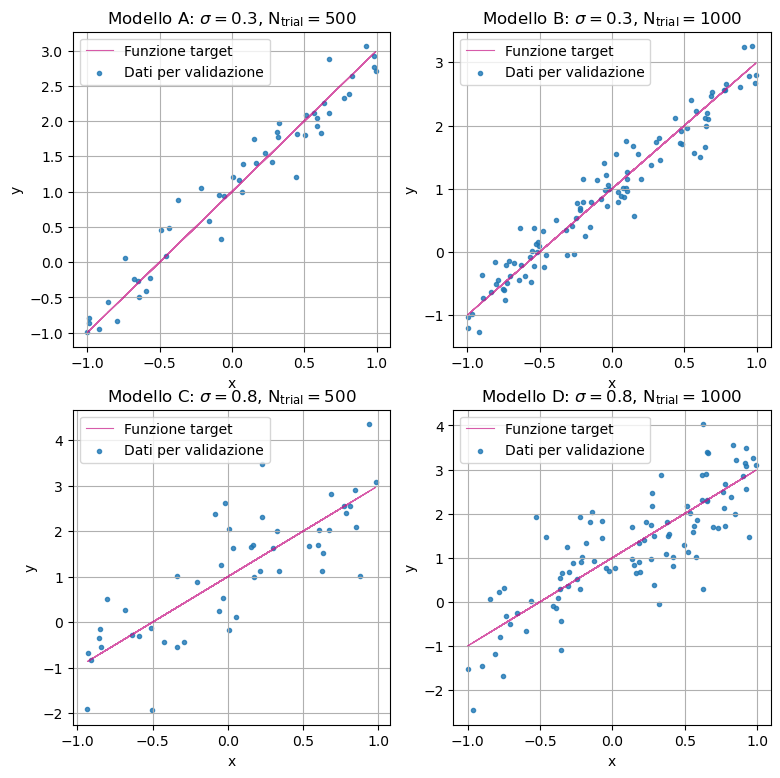

In [37]:
#plot con dati di validazione e training
dfig, dplt = plt.subplots(2, 2, figsize=(9, 9))

(dplt1, dplt2), (dplt3, dplt4) = dplt

dplt1.plot(a_x_valid, a_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt1.scatter(a_x_valid, a_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt1.set_xlabel('x')
dplt1.set_ylabel('y')
dplt1.set_title(r'Modello A: $\sigma=0.3$, $\mathrm{N_{trial}}=500$')
dplt1.legend()
dplt1.grid(True)

dplt2.plot(b_x_valid, b_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt2.scatter(b_x_valid, b_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt2.set_xlabel('x')
dplt2.set_ylabel('y')
dplt2.set_title(r'Modello B: $\sigma=0.3$, $\mathrm{N_{trial}}=1000$')
dplt2.legend()
dplt2.grid(True)

dplt3.plot(c_x_valid, c_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt3.scatter(c_x_valid, c_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt3.set_xlabel('x')
dplt3.set_ylabel('y')
dplt3.set_title(r'Modello C: $\sigma=0.8$, $\mathrm{N_{trial}}=500$')
dplt3.legend()
dplt3.grid(True)

dplt4.plot(d_x_valid, d_y_target, color='mediumvioletred', label='Funzione target', linewidth=0.8, alpha=0.7)
dplt4.scatter(d_x_valid, d_y_valid, label='Dati per validazione', marker='.', alpha=0.8)
dplt4.set_xlabel('x')
dplt4.set_ylabel('y')
dplt4.set_title(r'Modello D: $\sigma=0.8$, $\mathrm{N_{trial}}=1000$')
dplt4.legend()
dplt4.grid(True)

plt.show()

### $\mathrm{N_{epoche}}=30$

#### Modello A

In [45]:
#compilazione e fitting
af_model=tf.keras.Sequential()
af_model.add(Input(shape=(1,)))
af_model.add(Dense(1))
af_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
af_model.summary()

af_history=af_model.fit(x=a_x_train, y=a_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(a_x_valid, a_y_valid))

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9293 - mse: 0.9293 - val_loss: 0.6960 - val_mse: 0.6960
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6030 - mse: 0.6030 - val_loss: 0.4252 - val_mse: 0.4252
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3289 - mse: 0.3289 - val_loss: 0.2744 - val_mse: 0.2744
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2374 - mse: 0.2374 - val_loss: 0.1896 - val_mse: 0.1896
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1736 - mse: 0.1736 - val_loss: 0.1421 - val_mse: 0.1421
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1478 - mse: 0.1478 - val_loss: 0.1146 - val_mse: 0.1146
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1276 - mse: 0.1276 - val_loss: 0.0985 - val_mse: 0.0985
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1035 - mse: 0.1035 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1000 - mse: 

In [46]:
#valutazione del modello A con il dataset di validazione e i dati di target
af_model.get_weights()

print('Modello A, 30 epoche, dataset validazione')
af_score=af_model.evaluate(a_x_valid, a_y_valid, batch_size=30, verbose=1)
print('Test loss:', af_score[0])
print('Test accuracy:', af_score[1])

print('Modello A, 30 epoche, dataset target')
af_score=af_model.evaluate(a_x_valid, a_y_target, batch_size=30, verbose=1)
print('Test loss:', af_score[0])
print('Test accuracy:', af_score[1])

Modello A, 30 epoche, dataset validazione
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0780 - mse: 0.0780 
Test loss: 0.07526061683893204
Test accuracy: 0.07526061683893204
Modello A, 30 epoche, dataset target
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0784e-04 - mse: 9.0784e-04 
Test loss: 0.0009523877524770796
Test accuracy: 0.0009523877524770796


#### Modello B

In [47]:
#compilazione e fitting
bf_model=tf.keras.Sequential()
bf_model.add(Input(shape=(1,)))
bf_model.add(Dense(1))
bf_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
bf_model.summary()

bf_history=bf_model.fit(x=b_x_train, y=b_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(b_x_valid, b_y_valid))

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.7377 - mse: 4.7377 - val_loss: 2.2876 - val_mse: 2.2876
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5971 - mse: 2.5971 - val_loss: 1.4105 - val_mse: 1.4105
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6177 - mse: 1.6177 - val_loss: 0.9050 - val_mse: 0.9050
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0370 - mse: 1.0370 - val_loss: 0.5949 - val_mse: 0.5949
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6710 - mse: 0.6710 - val_loss: 0.4007 - val_mse: 0.4007
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4707 - mse: 0.4707 - val_loss: 0.2775 - val_mse: 0.2775
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3451 - mse: 0.3451 - val_loss: 0.1977 - val_mse: 0.1977
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2441 - mse: 0.2441 - val_loss: 0.1488 - val_mse: 0.1488
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1836 - mse: 

In [48]:
#valutazione del modello B con il dataset di validazione e i dati di target
bf_model.get_weights()

print('Modello B, 30 epoche, dataset validazione')
bf_score=bf_model.evaluate(b_x_valid, b_y_valid, batch_size=30, verbose=1)
print('Test loss:', bf_score[0])
print('Test accuracy:', bf_score[1])

print('Modello B, 30 epoche, dataset target')
bf_score=bf_model.evaluate(b_x_valid, b_y_target, batch_size=30, verbose=1)
print('Test loss:', bf_score[0])
print('Test accuracy:', bf_score[1])

Modello B, 30 epoche, dataset validazione
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0854 - mse: 0.0854 
Test loss: 0.07762657850980759
Test accuracy: 0.07762657850980759
Modello B, 30 epoche, dataset target
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1121e-04 - mse: 1.1121e-04 
Test loss: 0.00010924164234893396
Test accuracy: 0.00010924164234893396


#### Modello C

In [49]:
#compilazione e fitting
cf_model=tf.keras.Sequential()
cf_model.add(Input(shape=(1,)))
cf_model.add(Dense(1))
cf_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
cf_model.summary()

cf_history=cf_model.fit(x=c_x_train, y=c_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(c_x_valid, c_y_valid))

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.8684 - mse: 4.8684 - val_loss: 4.7548 - val_mse: 4.7548
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8288 - mse: 3.8288 - val_loss: 3.8571 - val_mse: 3.8571
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3692 - mse: 3.3692 - val_loss: 3.1872 - val_mse: 3.1872
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6909 - mse: 2.6909 - val_loss: 2.6641 - val_mse: 2.6641
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3387 - mse: 2.3387 - val_loss: 2.2688 - val_mse: 2.2688
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0682 - mse: 2.0682 - val_loss: 1.9561 - val_mse: 1.9561
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9331 - mse: 1.9331 - val_loss: 1.7087 - val_mse: 1.7087
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5672 - mse: 1.5672 - val_loss: 1.5080 - val_mse: 1.5080
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4322 - mse:

In [50]:
#valutazione del modello C con il dataset di validazione e i dati di target
cf_model.get_weights()

print('Modello C, 30 epoche, dataset validazione')
cf_score=bf_model.evaluate(c_x_valid, c_y_valid, batch_size=30, verbose=1)
print('Test loss:', cf_score[0])
print('Test accuracy:', cf_score[1])

print('Modello C, 30 epoche, dataset target')
cf_score=cf_model.evaluate(c_x_valid, c_y_target, batch_size=30, verbose=1)
print('Test loss:', cf_score[0])
print('Test accuracy:', cf_score[1])

Modello C, 30 epoche, dataset validazione
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6905 - mse: 0.6905 
Test loss: 0.6586448550224304
Test accuracy: 0.6586448550224304
Modello C, 30 epoche, dataset target
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mse: 0.0248 
Test loss: 0.023793073371052742
Test accuracy: 0.023793073371052742


#### Modello D

In [51]:
#compilazione e fitting
df_model=tf.keras.Sequential()
df_model.add(Input(shape=(1,)))
df_model.add(Dense(1))
df_model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
df_model.summary()

df_history=df_model.fit(x=d_x_train, y=d_y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(d_x_valid, d_y_valid))

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6738 - mse: 1.6738 - val_loss: 1.0523 - val_mse: 1.0523
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9775 - mse: 0.9775 - val_loss: 0.7460 - val_mse: 0.7460
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7897 - mse: 0.7897 - val_loss: 0.6352 - val_mse: 0.6352
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7603 - mse: 0.7603 - val_loss: 0.5860 - val_mse: 0.5860
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6698 - mse: 0.6698 - val_loss: 0.5647 - val_mse: 0.5647
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6895 - mse: 0.6895 - val_loss: 0.5540 - val_mse: 0.5540
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7015 - mse: 0.7015 - val_loss: 0.5486 - val_mse: 0.5486
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6564 - mse: 0.6564 - val_loss: 0.5459 - val_mse: 0.5459
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6319 - mse: 

In [52]:
#valutazione del modello D con il dataset di validazione e i dati di target
df_model.get_weights()

print('Modello D, 30 epoche, dataset validazione')
df_score=bf_model.evaluate(d_x_valid, d_y_valid, batch_size=30, verbose=1)
print('Test loss:', df_score[0])
print('Test accuracy:', df_score[1])

print('Modello D, 30 epoche, dataset target')
df_score=cf_model.evaluate(d_x_valid, d_y_target, batch_size=30, verbose=1)
print('Test loss:', df_score[0])
print('Test accuracy:', df_score[1])

Modello D, 30 epoche, dataset validazione
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5626 - mse: 0.5626 
Test loss: 0.5467708110809326
Test accuracy: 0.5467708110809326
Modello D, 30 epoche, dataset target
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228 - mse: 0.0228 
Test loss: 0.023460261523723602
Test accuracy: 0.023460261523723602


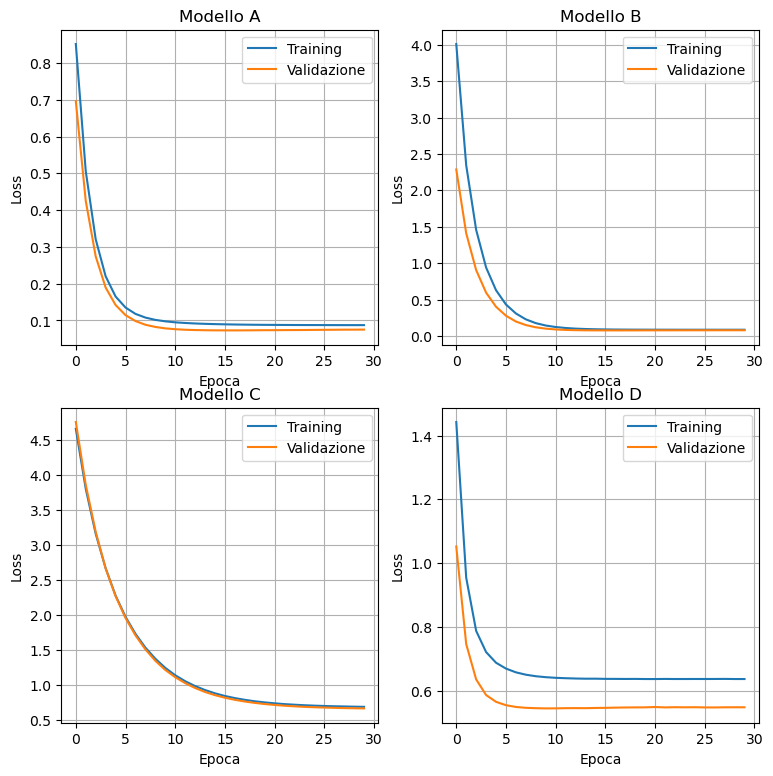

In [53]:
#plot dei valori della loss function di training vs validazione
lffig, lfplt = plt.subplots(2, 2, figsize=(9, 9))

(lfplt1, lfplt2), (lfplt3, lfplt4) = lfplt

lfplt1.plot(af_history.history['loss'])
lfplt1.plot(af_history.history['val_loss'])
lfplt1.set_title('Modello A')
lfplt1.set_ylabel('Loss')
lfplt1.set_xlabel('Epoca')
lfplt1.legend(['Training', 'Validazione'], loc='best')
lfplt1.grid(True)

lfplt2.plot(bf_history.history['loss'])
lfplt2.plot(bf_history.history['val_loss'])
lfplt2.set_title('Modello B')
lfplt2.set_ylabel('Loss')
lfplt2.set_xlabel('Epoca')
lfplt2.legend(['Training', 'Validazione'], loc='best')
lfplt2.grid(True)

lfplt3.plot(cf_history.history['loss'])
lfplt3.plot(cf_history.history['val_loss'])
lfplt3.set_title('Modello C')
lfplt3.set_ylabel('Loss')
lfplt3.set_xlabel('Epoca')
lfplt3.legend(['Training', 'Validazione'], loc='best')
lfplt3.grid(True)

lfplt4.plot(df_history.history['loss'])
lfplt4.plot(df_history.history['val_loss'])
lfplt4.set_title('Modello D')
lfplt4.set_ylabel('Loss')
lfplt4.set_xlabel('Epoca')
lfplt4.legend(['Training', 'Validazione'], loc='best')
lfplt4.grid(True)

plt.show()

### $\mathrm{N_{epoche}}=80$

In [ ]:
#qua faccio un plot sovrapponendo le due epoche per ogni modello
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()